Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **1 hour and 30 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Adaobi Amanna"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Mergesort and recurrences

## Question 1 [time estimate: 20 minutes]

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.

**Note**: ```MERGE``` function is to combine two lists together, not to create a sorted list. Please check the parameters carefully to correctly identify two sub-lists you need to merge.


[2,6,7,8,1,4,6,9],<br />

[6,7,8]    [**1**,4,6],<br />

[2,**1**,7,8,1,4,6,9], <br />

[6,7,8]    [1,**4**,6], <br />

[2,1,**4**,8,1,4,6,9], <br />

[6,7,8]    [1,4,**6**],<br />

[2,1,4,**6**,1,4,6,9], <br />

[6,**7**,8]    [1,4,6],<br />

[2,1,4,6,1,**7**,4,9],<br />

[6,7,**8**]    [1,4,6],<br />

[2,1,4,6,1,7,**8**,9]<br />

## Question 2 [time estimate: 5 minutes]
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python lists). Give your answer in prose in the cell below.

since the time usage is O(N), we can make it more efficient by addressing the space usage. We can start applying the merge function without first initializing a new array.

## Question 3 [time estimate: 20 minutes]

Write a Python implementation of the merge pseudocode (both parts). Your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A.

**Note**: Please note that the pseudocde in Cormen et. al. works with the indexing convention starting at 1; in Python we will use the customary indexing convention starting at 0.

In [16]:
def merge(A, p, q, r):
    #start by initializing the length of left and right sub-arrays
    left = q - p + 1
    right = r - q 
  
    #initialize a temporary holder 
    L = [0] * (left) 
    R = [0] * (right) 
    
#loop through the left and right sub-arrays and copy to the temporal holders L[] and R[] 
    for i in range(left): 
        L[i] = A[p + i] 
  
    for j in range(right): 
        R[j] = A[q + 1 + j] 
  
    # Merges the temporary arrays into arr[p..r] 
    i = 0     # Initialize the index of first subarray 
    j = 0     # Initialize the index of second subarray
    k = p     # Initialize the index of merged subarray
  
    #while a condition is in place, loops through the arrays and modify
    while i < left and j < right : 
        if L[i] <= R[j]: 
            A[k] = L[i] 
            i += 1
        else: 
            A[k] = R[j] 
            j += 1
        k += 1
  
    # Copies the remaining elements of L[]
    while i < left: 
        A[k] = L[i] 
        i += 1
        k += 1
    # Copy the remaining elements of R[] 
    while j < right: 
        A[k] = R[j] 
        j += 1
        k += 1

    return A
print(merge([2,6,7,8,1,4,6,9],1,3,6))

print(merge([3,2,6,7,9,8,1,4,6,1,9],2,4,6))

[2, 1, 4, 6, 6, 7, 8, 9]
[3, 2, 6, 7, 8, 1, 9, 4, 6, 1, 9]


In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [time estimate: 5 minutes]

Suppose that your Python implementation of the merge algorithm is already working. Read and comment the code for merge sort below:

In [6]:
 

def merge_sort(A,p,r):
    """""""""
This function uses the divide and conquer approach to sort an array recursively
It divides the array, then calls the function recursively combines ones it gets
to the base case.
    """""""""
    if p < r:
        
#initializes the condition for applying the recursive function
        
        q = (p+r)//2
#finds the middle of the array by dividing without remainder to get the mid value.
#using a // in this case also helps especially if the array is odd
        
        merge_sort(A,p,q)
#This recursively calls the Left side of the array and further breaks it down
    
        merge_sort(A,q+1,r)
#this calls the right side recursively

        merge(A,p,q,r)
#calls the merge function that sorts recursively and combines.

    return(A)

In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [time estimate: 15 minutes]
Count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. If you are not familiar with what this piece of code is doing, you may want to check the "List Comprehension" section in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx).


In [17]:
def stepcount():
    #initialize the counter
    counter = []
    lst = []
    #makes 15 counts for k = 1 ... 15
    for k in range(1,16):
        #create a list for the range of input. 
        list_k = [i for i in range(100 *k, 0,-1)]
        #calls the merge sort function and appends the final count to a list
        Z,fincounter = merge_sort(list_k, 0,len(list_k)-1,counter[:])
        lst.append(sum(fincounter))
    return lst
    
    

    
def merge_sort(A,p,r, counter):
    """""""""
This function uses the divide and conquer approach to sort an array recursively
It divides the array, then calls the function recursively combines ones it gets
to the base case.
Additionally, we add a counter to count the steps taken.
    """""""""
    if p < r:
        
#initializes the condition for applying the recursive function
        
        q = (p+r)//2
#finds the middle of the array by dividing without remainder to get the mid value.
#using a // in this case also helps especially if the array is odd
        
        counter.append(1)
        #update counter
        
        merge_sort(A,p,q,counter)
#This recursively calls the Left side of the array and further breaks it down
    
        merge_sort(A,q+1,r,counter)
#this calls the right side recursively

        merge(A,p,q,r)
#calls the merge function that sorts recursively and combines.

    return(A,counter)
print(stepcount())

[99, 199, 299, 399, 499, 599, 699, 799, 899, 999, 1099, 1199, 1299, 1399, 1499]


## Question 6 [time estimate: 25 minutes] 
Use the code you wrote for Lesson "Measuring algorithms' efficiency" (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

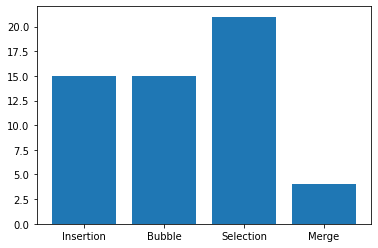

In [12]:
import timeit   #imports the timer module

start = timeit.default_timer()  #starts the timer for a function

#insertion sort algorithm
def insertion_sort(A):
    count = 0
    for j in range(1,len(A)):
        i = j-1
        key = A[j]
        while i >= 0 and A[i] > key:
            A[i+1] = A[i]
            i-=1
            count+=1
        A[i+1] = key
    #returns the count
    return count
        
stop = timeit.default_timer()  #stops the timer
insert =  stop - start
            

start = timeit.default_timer()

#bubblesort algorithm
def bubble_sort(A):
    count = 0
    for i in range(len(A)-1):
        for j in range(len(A)-1,i,-1):
            if A[j-1] > A[j]:
                count+=1
                A[j-1],A[j] = A[j] ,A[j-1]
   
    return count
stop = timeit.default_timer()
bubble = stop - start


start = timeit.default_timer()
#selection algorithm
def smallest(A):
    count = 0
    small = float('inf')
    for i in range(len(A)):
        if A[i] < small:
            small = A[i]
            index = i
            count+=1
    return index, count

def selection_sort(A):
    final_count = 0
    lst =[]
    for j in range(len(A)):
        a,b = smallest(A)
        lst.append(A.pop(a))
        final_count += b

    return final_count
    

stop = timeit.default_timer()
selection = stop - start


start = timeit.default_timer()

    
def merge_sort(A,p,r,counter):
    if p < r:
        #finds the mid value
        q = (p+r)//2
        counter.append(1)
        merge_sort(A,p,q,counter) #recursively calls the left part of the array and further divides it
        merge_sort(A,q+1,r,counter)  #recursively calls the right part of the array
        merge(A,p,q,r) #calls the merge that does the conquer and combine parts
    return(A,counter)

def stepcount():
    #initializes the step counter
    counter = []
    #calls the merge sort function and appends the final count to a list
    Z,fincounter = merge_sort([6,5,4,3,2,1], 0,4, counter[:])
    return sum(fincounter)
stop = timeit.default_timer()
merged = stop - start



from matplotlib import pyplot as plt
names = ['Insertion', 'Bubble', 'Selection', 'Merge']



a = insertion_sort([6,5,4,3,2,1])
b =bubble_sort([6,5,4,3,2,1])
c= selection_sort([6,5,4,3,2,1])
d = stepcount()

values = [a,b,c,d]

plt.bar(names,values)


plt.show()


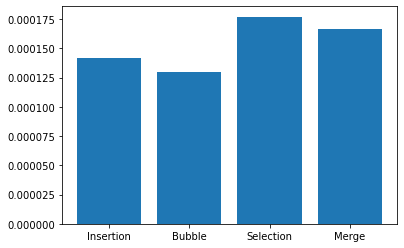

In [14]:
plt.bar(names,[insert, bubble, selection ,merged])
plt.show()